# Итоговая по python

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [7]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

## 1. Загрузите файл HR.csv в pandas dataframe

In [8]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2.1. Рассчитайте основные статистики для переменных (среднее,медиана,мин/макс,сред.отклонение).

In [9]:
# основные статистики для переменных
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 2.2. Рассчитайте основные статистики для переменных (мода).

In [10]:
# мода для переменных
hr.mode(dropna=True).drop(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


## 3.1. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

In [11]:
# корреляционная матрица для количественных переменных
hr_quantitative_corr = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
hr_quantitative_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


[Text(0.5, 1.0, 'Quantitative correlation coefficients heatmap representation')]

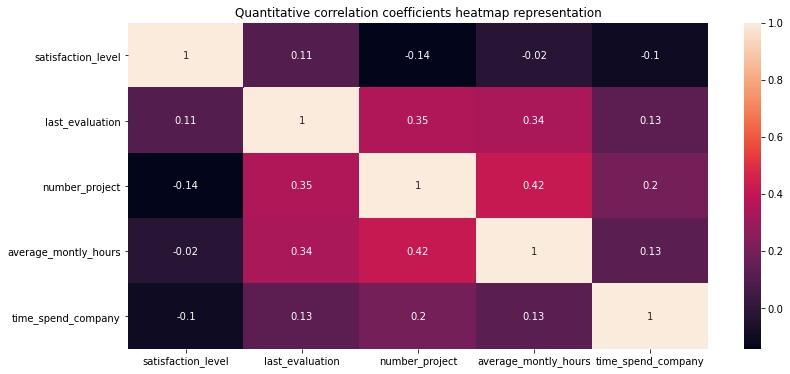

In [12]:
# корреляционная heatmap для количественных переменных
sns.heatmap(hr_quantitative_corr, annot=True).set(title='Quantitative correlation coefficients heatmap representation')

## 3.2. Определите две самые скоррелированные и две наименее скоррелированные переменные:

- Две самые скоррелированные переменные - average_montly_hours, number_project (0.42)   
- Две наимение скоррелированные переменные - average_montly_hours, satisfaction_level (-0.02)

## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [13]:
# сотрудников работает в каждом департаменте
hr_by_department = hr.groupby('department').count().sort_values('salary', ascending=False)['salary']
hr_by_department

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: salary, dtype: int64

## 5. Показать распределение сотрудников по зарплатам.

[Text(0.5, 1.0, 'Employes distribution by salary')]

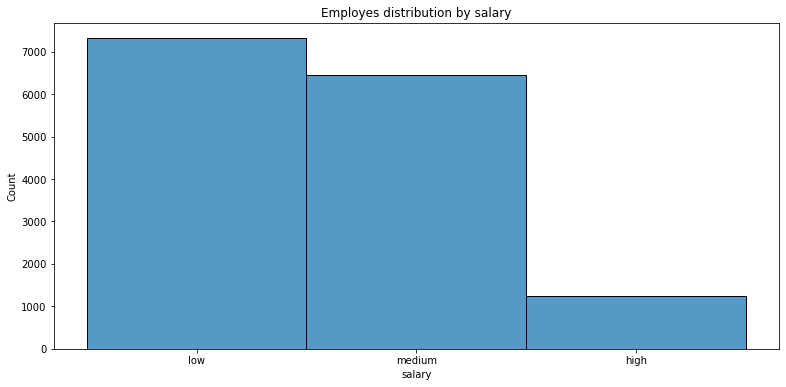

In [14]:
# распределение сотрудников по зарплатам
sns.histplot(data=hr, x='salary').set(title='Employes distribution by salary')

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

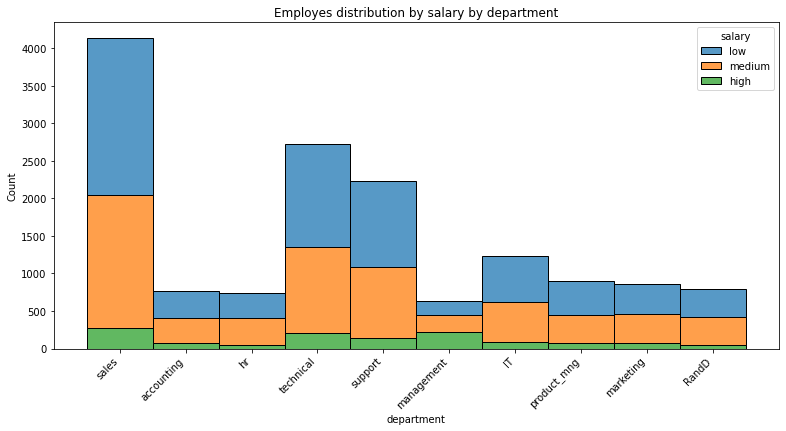

In [15]:
# распределение сотрудников по зарплатам в каждом департаменте по отдельности
sns.histplot(data=hr, x='department', hue='salary', multiple='stack').set(title='Employes distribution by salary by department')
plt.xticks(rotation=45, ha='right')

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

H0: сотрудники с высоким и низким окладом **НЕ** проводят на работе разное количество времени    
H1: сотрудники с высоким и низким окладом проводят на работе разное количество времени

In [28]:
alpha = 0.05
hr_hours_salary_high = hr[hr['salary'] == 'high']['average_montly_hours'].dropna()
hr_hours_salary_low = hr[hr['salary'] == 'low']['average_montly_hours'].dropna()
result = stats.ttest_ind(hr_hours_salary_high, hr_hours_salary_low, equal_var=False)

print(hr_hours_salary_high.mean())
print(hr_hours_salary_low.mean())
print(result)
higher_mean = ''

if hr_hours_salary_high.mean() > hr_hours_salary_low.mean():
    higher_mean = 'high'
else:
    higher_mean = 'low'

if result.pvalue < alpha: 
    print(f'Отвергаем нулевую гипотезу, сотрудники с высоким и низким окладом проводят на работе разное количество времени. Судя по средним значениям сотрудники с {higher_mean} окладом проводят на работе больше времени.')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Cотрудники с высоким и низким окладом не проводят на работе разное количество времени.')

199.86742118027485
200.9965828321487
Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую нулевую гипотезу. Cотрудники с высоким и низким окладом не проводят на работе разное количество времени.


## 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

In [17]:
hr_left = hr[hr['left'] == 1]
hr_not_left = hr[hr['left'] == 0]

### 8.1. Доля сотрудников с повышением за последние 5 лет

In [18]:
# Доля сотрудников с повышением за последние 5 лет
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся: ', len(hr_left[hr_left['promotion_last_5years'] == 1]) / len(hr_left))
print('Доля сотрудников с повышением за последние 5 лет среди не уволившихся: ', len(hr_not_left[hr_not_left['promotion_last_5years'] == 1]) / len(hr_not_left))

Доля сотрудников с повышением за последние 5 лет среди уволившихся:  0.005320638476617194
Доля сотрудников с повышением за последние 5 лет среди не уволившихся:  0.026251312565628283


### 8.2. Средняя степень удовлетворенности

In [19]:
# Средняя степень удовлетворенности
print('Средняя степень удовлетворенности среди уволившихся: ', hr_left['satisfaction_level'].mean())
print('Средняя степень удовлетворенности среди не уволившихся: ', hr_not_left['satisfaction_level'].mean())

Средняя степень удовлетворенности среди уволившихся:  0.44009801176140917
Средняя степень удовлетворенности среди не уволившихся:  0.666809590479516


### 8.3. Среднее количество проектов

In [20]:
# Среднее количество проектов
print('Среднее количество проектов среди уволившихся: ', hr_left['number_project'].mean())
print('Среднее количество проектов среди не уволившихся: ', hr_not_left['number_project'].mean())

Среднее количество проектов среди уволившихся:  3.8555026603192384
Среднее количество проектов среди не уволившихся:  3.786664333216661


## 9. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

In [21]:
hr_lda = hr.drop(columns=['department', 'salary', 'left'])

### 9.1. Разделить данные на тестовую и обучающую выборки

In [22]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hr_lda, hr['left'], test_size=0.25)

### 9.2. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [24]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

### 9.3. Оценить качество модели на тестовой выборки

In [26]:
# расчитаем точность

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7693333333333333

In [27]:
# построим confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lda.predict(X_test))

array([[2660,  206],
       [ 659,  225]])

### Выводы:
- точность модели - 0.769, что является не очень высоким уровнем, но достаточным чтобы не отказываться от использования модели
- исходя из confusion matrix модель достаточно успешно предсказывает то, что сотрудник уволится, если он на самом деле уволился,
- но слишком часто не предсказывает увольнение, когда сотрудник на самом деле уволился